Data Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---

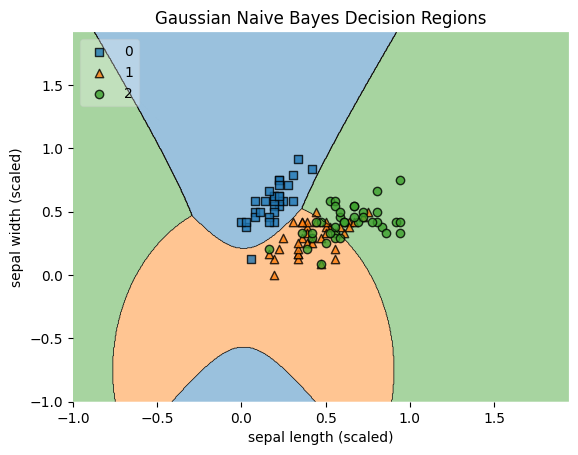

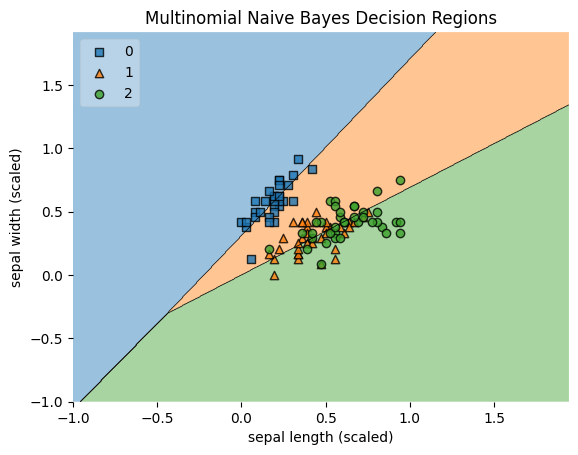

In [3]:
# Install required libraries
!pip install -q mlxtend scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_decision_regions

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
target_names = iris.target_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Describe the data
print("Data Description:")
print(X.describe())
print("\nInfo:")
print(X.info())
print("\nFirst 5 rows:")
print(X.head())

# Scale features for MultinomialNB (requires non-negative features)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Naive Bayes Models ---

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"\nGaussian Naive Bayes Accuracy: {accuracy_gnb:.4f}")

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.4f}")

# --- Plotting Decision Regions (only first 2 features) ---
X_train_plot = X_train.iloc[:, :2].values
y_train_plot = y_train.values

# Gaussian NB Plot
fig, ax = plt.subplots()
plot_decision_regions(X_train_plot, y_train_plot, clf=GaussianNB().fit(X_train_plot, y_train_plot), legend=2)
plt.xlabel('sepal length (scaled)')
plt.ylabel('sepal width (scaled)')
plt.title('Gaussian Naive Bayes Decision Regions')
plt.show()

# Multinomial NB Plot
fig, ax = plt.subplots()
plot_decision_regions(X_train_plot, y_train_plot, clf=MultinomialNB().fit(X_train_plot, y_train_plot), legend=2)
plt.xlabel('sepal length (scaled)')
plt.ylabel('sepal width (scaled)')
plt.title('Multinomial Naive Bayes Decision Regions')
plt.show()


In [5]:
print(iris.data,iris.target)
target = iris.target
target_names = iris.target_names
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])
print(df[['species', 'species_name']])

print(df.head())  ## 0-> sentosa, 1-> versicolor, 2-> virginica

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Data Description:
          feature1     feature2
count  1000.000000  1000.000000
mean      0.839000     0.477000
std       0.367715     0.499721
min       0.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  1000 non-null   int64
 1   feature2  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB
None

First 5 rows of features:
   feature1  feature2
0         1         1
1         1         0
2         1         0
3         1         1
4         1         1

First 5 rows of target:
0    1
1    0
2    0
3    0
4    1
Name: target, dtype: int64

Bernoulli Naive Bayes Accuracy: 0.8950


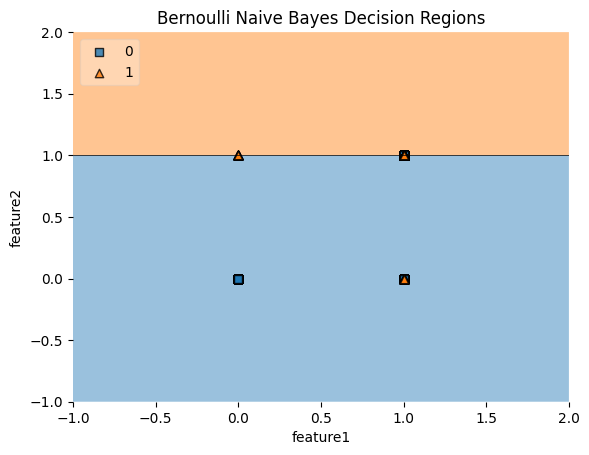

In [7]:
# prompt: use some random dataset which has input and output datasets in binary form to perform Bernoulli NB and use mlxtend,plotting for plotting the curve  and describe the dataset and use pd.dataframe to show the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Install required libraries
!pip install -q mlxtend scikit-learn

# Generate a synthetic binary dataset
# This creates a dataset with 1000 samples, 2 features, 2 classes
# and sets random_state for reproducibility
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.01,
                           class_sep=1.0, random_state=42)

X_binary = (X > 0).astype(int)
# Convert to pandas DataFrame for easier handling and description
X_df = pd.DataFrame(X_binary, columns=['feature1', 'feature2'])
y_series = pd.Series(y, name='target')

# Describe the dataset
print("Data Description:")
print(X_df.describe())
print("\nInfo:")
print(X_df.info())
print("\nFirst 5 rows of features:")
print(X_df.head())
print("\nFirst 5 rows of target:")
print(y_series.head())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Bernoulli Naive Bayes (requires binary features or features representing counts)
# Since our synthetic data is continuous, we need to binarize it for BernoulliNB
# A common way is to check if a feature is greater than some threshold (e.g., 0 or mean)
# Here, we'll use the default binarize=0.0 threshold which effectively treats non-zero values as 1
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"\nBernoulli Naive Bayes Accuracy: {accuracy_bnb:.4f}")

# Plotting Decision Regions
fig, ax = plt.subplots()
# We train a new classifier instance for plotting on the training data
# and use the original X_train and y_train which are numpy arrays
plot_decision_regions(X_train, y_train, clf=BernoulliNB().fit(X_train, y_train), legend=2)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Bernoulli Naive Bayes Decision Regions')
plt.show()